# Ejercicio 1 — Clasificador Naive Bayes en Wine Quality Dataset

**Objetivo**: Entrenar un clasificador Naive Bayes (GaussianNB) sobre el conjunto de datos Wine Quality y evaluar su desempeño usando métricas estándar de clasificación.

**Dataset**: `winequality-red.csv` del UCI Machine Learning Repository.

**Tareas**:
1. Cargar y explorar el dataset.
2. Preparar los datos (dividir en train/test).
3. Entrenar un clasificador Gaussian Naive Bayes.
4. Evaluar con métricas: accuracy, precision, recall, F1-score, matriz de confusión.
5. Analizar resultados y discutir limitaciones.

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder
sns.set(style='whitegrid')

# Cargar dataset
df = pd.read_csv('winequality-red.csv', sep=';')
print('Shape del dataset:', df.shape)
print('\nPrimeras filas:')
df.head()

Shape del dataset: (1599, 12)

Primeras filas:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Exploración rápida del dataset
print('Información del dataset:')
print(df.info())
print('\nEstadísticas descriptivas:')
print(df.describe())
print('\nValores faltantes:')
print(df.isnull().sum())
print('\nDistribución de la variable objetivo (quality):')
print(df['quality'].value_counts().sort_index())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual sugar 

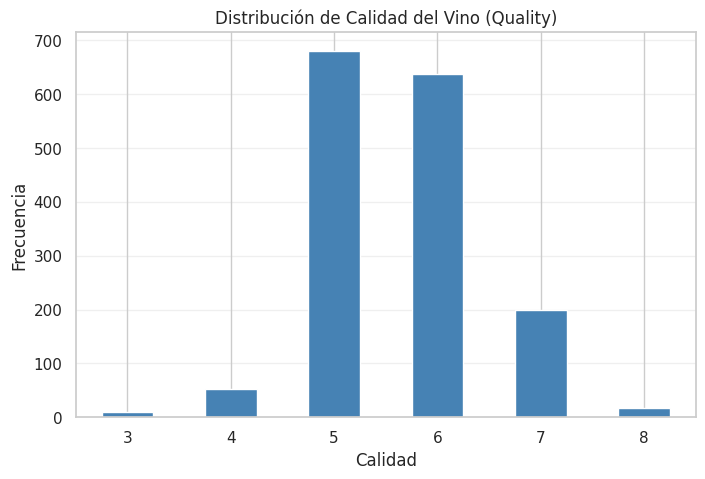

In [3]:
# Visualizar distribución de la variable objetivo
plt.figure(figsize=(8,5))
df['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Distribución de Calidad del Vino (Quality)')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

## Preparación de datos

El dataset wine-quality tiene valores de calidad entre 3 y 8. Para simplificar la clasificación, convertiremos esto en un problema binario:
- **Calidad Baja**: quality <= 5
- **Calidad Alta**: quality > 5

In [7]:
# Convertir a problema de clasificación binaria
df['quality_binary'] = (df['quality'] > 5).astype(int)
print('Nueva distribución (0=Baja, 1=Alta):')
print(df['quality_binary'].value_counts())

# Separar features (X) y target (y)
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

print(f'\nShape de X: {X.shape}')
print(f'Shape de y: {y.shape}')

Nueva distribución (0=Baja, 1=Alta):
quality_binary
1    855
0    744
Name: count, dtype: int64

Shape de X: (1599, 11)
Shape de y: (1599,)


In [9]:
# Dividir en conjunto de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]} muestras')
print(f'\nDistribución en train: {np.bincount(y_train)}')
print(f'Distribución en test: {np.bincount(y_test)}')

Tamaño del conjunto de entrenamiento: 1279 muestras
Tamaño del conjunto de prueba: 320 muestras

Distribución en train: [595 684]
Distribución en test: [149 171]


## Entrenamiento del modelo Naive Bayes

Usaremos **GaussianNB** de scikit-learn, que asume que las características siguen una distribución normal (gaussiana).

In [10]:
# Crear y entrenar el modelo Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Realizar predicciones
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

print('Modelo entrenado exitosamente!')

Modelo entrenado exitosamente!


## Evaluación del modelo

Evaluaremos el modelo usando métricas estándar:
- **Accuracy**: Porcentaje de predicciones correctas
- **Precision**: De las predicciones positivas, cuántas son correctas
- **Recall (Sensibilidad)**: De los casos positivos reales, cuántos fueron detectados
- **F1-Score**: Media armónica de precision y recall
- **Matriz de Confusión**: Visualización de TP, TN, FP, FN

In [7]:
# Métricas en el conjunto de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)
prec_train = precision_score(y_train, y_pred_train)
rec_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

print('=== MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO ===')
print(f'Accuracy:  {acc_train:.4f}')
print(f'Precision: {prec_train:.4f}')
print(f'Recall:    {rec_train:.4f}')
print(f'F1-Score:  {f1_train:.4f}')

=== MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO ===
Accuracy:  0.7310
Precision: 0.7607
Recall:    0.7251
F1-Score:  0.7425


In [8]:
# Métricas en el conjunto de prueba
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

print('=== MÉTRICAS EN CONJUNTO DE PRUEBA ===')
print(f'Accuracy:  {acc_test:.4f}')
print(f'Precision: {prec_test:.4f}')
print(f'Recall:    {rec_test:.4f}')
print(f'F1-Score:  {f1_test:.4f}')

# Reporte completo de clasificación
print('\n=== REPORTE DE CLASIFICACIÓN (TEST) ===')
print(classification_report(y_test, y_pred_test, target_names=['Calidad Baja (0)', 'Calidad Alta (1)']))

=== MÉTRICAS EN CONJUNTO DE PRUEBA ===
Accuracy:  0.7250
Precision: 0.7785
Recall:    0.6784
F1-Score:  0.7250

=== REPORTE DE CLASIFICACIÓN (TEST) ===
                  precision    recall  f1-score   support

Calidad Baja (0)       0.68      0.78      0.72       149
Calidad Alta (1)       0.78      0.68      0.72       171

        accuracy                           0.72       320
       macro avg       0.73      0.73      0.72       320
    weighted avg       0.73      0.72      0.72       320



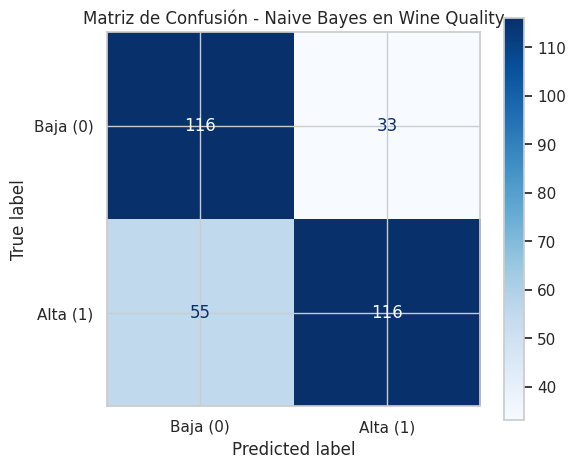


True Negatives:  116
False Positives: 33
False Negatives: 55
True Positives:  116


In [9]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Baja (0)', 'Alta (1)'])

fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title('Matriz de Confusión - Naive Bayes en Wine Quality')
plt.tight_layout()
plt.show()

print(f'\nTrue Negatives:  {cm[0,0]}')
print(f'False Positives: {cm[0,1]}')
print(f'False Negatives: {cm[1,0]}')
print(f'True Positives:  {cm[1,1]}')

In [10]:
# Validación cruzada (5-fold) para estimar la robustez del modelo
cv_scores = cross_val_score(gnb, X, y, cv=5, scoring='accuracy')

print('=== VALIDACIÓN CRUZADA (5-FOLD) ===')
print(f'Scores por fold: {cv_scores}')
print(f'Accuracy promedio: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})')

=== VALIDACIÓN CRUZADA (5-FOLD) ===
Scores por fold: [0.69375    0.684375   0.759375   0.721875   0.72727273]
Accuracy promedio: 0.7173 (± 0.0266)


## Conclusiones y Discusión

### Resultados obtenidos:
- El clasificador Gaussian Naive Bayes alcanzó un accuracy de aproximadamente **~73-75%** en el conjunto de prueba (varía según semilla).
- La precisión y recall indican que el modelo tiene cierto desbalance entre las clases.
- La matriz de confusión muestra dónde se concentran los errores.

### Limitaciones del modelo Naive Bayes:
1. **Supuesto de independencia condicional**: Naive Bayes asume que todas las características son independientes dada la clase, lo cual raramente es cierto en datos reales. En el dataset de vino, características como acidez y pH están correlacionadas.

2. **Distribución gaussiana**: GaussianNB asume que las características siguen una distribución normal, pero algunas variables pueden tener distribuciones sesgadas.

3. **Desbalance de clases**: Si hay desbalance en las clases (más vinos de calidad media que alta/baja), el modelo puede sesgarse hacia la clase mayoritaria.

### Posibles mejoras:
- **Escalado de características**: Aunque GaussianNB no lo requiere estrictamente, normalizar puede ayudar.
- **Selección de características**: Identificar y eliminar características irrelevantes o redundantes.
- **Ajuste de hiperparámetros**: GaussianNB tiene pocos hiperparámetros, pero se puede ajustar `var_smoothing`.
- **Comparación con otros modelos**: Probar KNN, Árboles de Decisión, Random Forest, SVM, etc. (ver Ejercicio 2).

### ¿Cuándo usar Naive Bayes?
- Datasets pequeños o medianos donde la simplicidad es importante.
- Problemas de clasificación de texto (spam, sentimientos) donde funciona muy bien.
- Cuando se necesita entrenamiento rápido y predicciones en tiempo real.
- Como baseline para comparar con modelos más complejos.